In [67]:
import sys
sys.path.append('..')

In [68]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

from itertools import product, compress

from gruyere.brushes import notched_square_brush, show_mask

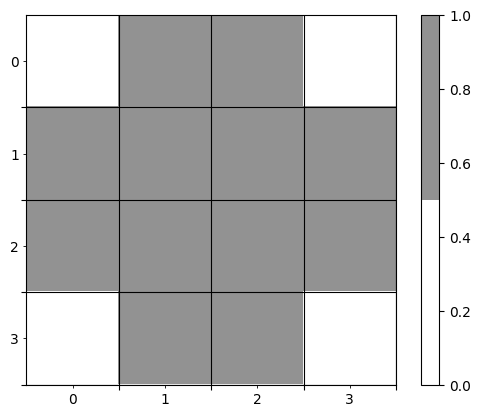

In [69]:
brush_even = notched_square_brush(4, 1)
show_mask(brush_even);

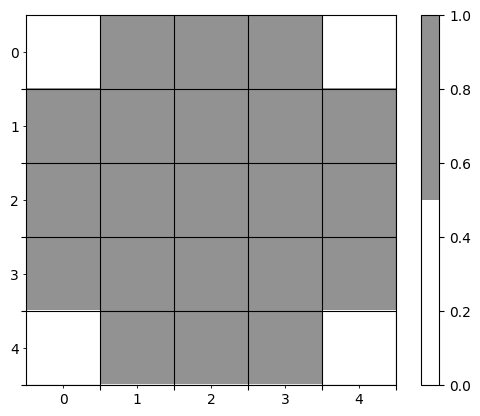

In [70]:
brush_odd = notched_square_brush(5, 1)
show_mask(brush_odd);

In [71]:
N = 50
arr_void = np.zeros([N]*2)

idx_conv = [N // 2, N // 2]

arr_void[*idx_conv] = 1

In [72]:
arr_1conv = convolve2d(arr_void, brush_odd, mode='same')
arr_2conv = convolve2d(arr_1conv, brush_odd, mode='same')

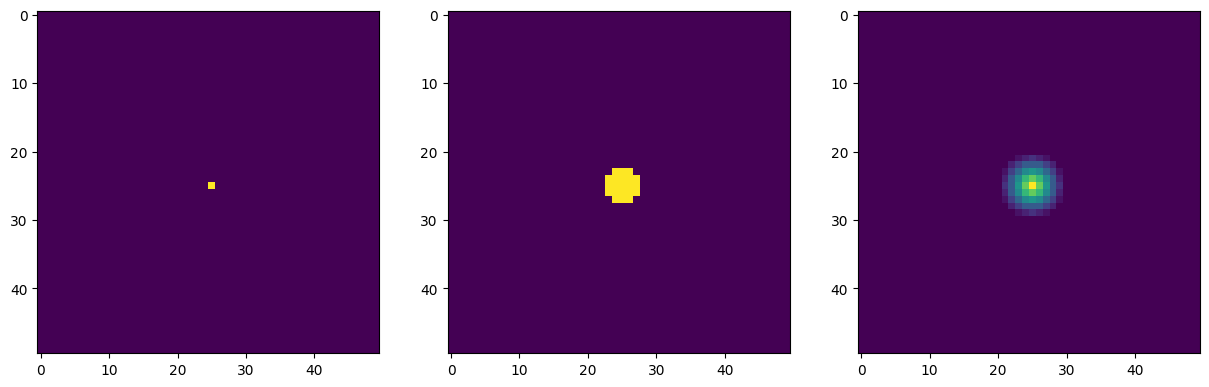

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(arr_void)
axs[1].imshow(arr_1conv)
axs[2].imshow(arr_2conv)

plt.show()

In [74]:
def get_convolved_idx(data, idxs0, brush):

    x_shape, y_shape = data.shape
    # Get the range from the brush POV centered on the pixel idxs0
    # which well be contained in the window
    brush_x_range = range(
        max(0, brush.shape[0] // 2 - idxs0[0]),
        min(brush.shape[0], brush.shape[0] // 2 + (x_shape - idxs0[0]))
    )
    brush_y_range = range(
        max(0, brush.shape[1] // 2 - idxs0[1]),
        min(brush.shape[1], brush.shape[1] // 2 + (y_shape - idxs0[1]))
    )
    # Get the range of the pixel with the brush centered at idxs0
    # which well be contained in the window
    x_range = range(
        max(0, idxs0[0] - brush.shape[0] // 2),
        min(idxs0[0] + 1 + brush.shape[0] // 2, x_shape)
    )
    y_range = range(
        max(0, idxs0[1] - brush.shape[1] // 2),
        min(idxs0[1] + 1 + brush.shape[1] // 2, y_shape)
    )

    # Generate the list of idx
    # Find the idx from the POV of the brush
    idx_brush_window = list(product(brush_x_range, brush_y_range))
    # Only keep the idx where the brush is True
    mask_brush = (brush[tuple(zip(*idx_brush_window))] == True)
    # Find the idx from the POV of the data
    idx_data_window = list(product(list(x_range), list(y_range)))
    # Use compress to filter the list of idx from the data POV
    idxs_conv = list(compress(idx_data_window,mask_brush))

    # return from_list_2ids_to_2list_id(idxs_conv)
    return idxs_conv

In [75]:
def get_double_convolved_idx(data, idxs0, doubled_brush):

    x_shape, y_shape = data.shape
    # Get the range from the brush POV centered on the pixel idxs0
    # which well be contained in the window
    brush_x_range = range(
        max(0, doubled_brush.shape[0] // 2 - idxs0[0]),
        min(doubled_brush.shape[0], doubled_brush.shape[0] // 2 + (x_shape - idxs0[0]))
    )
    brush_y_range = range(
        max(0, doubled_brush.shape[1] // 2 - idxs0[1]),
        min(doubled_brush.shape[1], doubled_brush.shape[1] // 2 + (y_shape - idxs0[1]))
    )
    # Get the range of the pixel with the brush centered at idxs0
    # which well be contained in the window
    x_range = range(
        max(0, idxs0[0] - doubled_brush.shape[0] // 2),
        min(idxs0[0] + 1 + doubled_brush.shape[0] // 2, x_shape)
    )
    y_range = range(
        max(0, idxs0[1] - doubled_brush.shape[1] // 2),
        min(idxs0[1] + 1 + doubled_brush.shape[1] // 2, y_shape)
    )

    # Generate the list of idx
    # Find the idx from the POV of the brush
    idx_brush_window = list(product(brush_x_range, brush_y_range))
    # Only keep the idx where the brush is True
    mask_brush = (doubled_brush[tuple(zip(*idx_brush_window))] == True)
    # Find the idx from the POV of the data
    idx_data_window = list(product(list(x_range), list(y_range)))
    # Use compress to filter the list of idx from the data POV
    idxs_conv = list(compress(idx_data_window,mask_brush))

    # return from_list_2ids_to_2list_id(idxs_conv)
    return idxs_conv

In [76]:
def from_list_id_couple_to_2tuples_ids(original_list):
    # return list(zip(*original_list))
    return tuple(zip(*original_list))


def from_2list_id_to_tuple_2ids(original_list):
    # return list(zip(*original_list))
    return tuple(zip(*original_list))

In [77]:
idx_mapped = list(map(
    lambda idx_var: get_convolved_idx(arr_void, idx_var, brush_odd),
    [idx_conv]
))

In [91]:
def test_conv(arr_void, idx, brush):

    fig, axs = plt.subplots(3, 3, figsize=(15, 5))

    arr_1conv = convolve2d(arr_void, brush_odd, mode='same')
    arr_2conv = convolve2d(arr_1conv, brush_odd, mode='same')

    idx_mapped = list(map(
        lambda idx_var: get_convolved_idx(arr_void, idx_var, brush),
        [idx]
    ))

    arr_1conv_from_idx = np.zeros(arr_1conv.shape)
    arr_1conv_from_idx[from_list_id_couple_to_2tuples_ids(*idx_mapped)] = arr_1conv[from_list_id_couple_to_2tuples_ids(*idx_mapped)]

    doubled_brush = (convolve2d(brush * 1, brush) != 0)
    idx2_mapped = list(map(
        lambda idx_var: get_double_convolved_idx(arr_void, idx_var, doubled_brush),
        [idx_conv]
    ))

    arr_2conv_from_idx = np.zeros(arr_2conv.shape)
    arr_2conv_from_idx[from_list_id_couple_to_2tuples_ids(*idx2_mapped)] = arr_2conv[from_list_id_couple_to_2tuples_ids(*idx2_mapped)]

    axs[0, 0].imshow(arr_void)
    axs[0, 1].imshow(arr_1conv)
    axs[0, 2].imshow(arr_2conv)

    axs[1, 0].imshow(arr_void)
    axs[1, 1].imshow(arr_1conv_from_idx)
    axs[1, 2].imshow(arr_2conv_from_idx)

    axs[2, 0].imshow(arr_void)
    axs[2, 1].imshow(arr_1conv_from_idx - arr_1conv)
    axs[2, 2].imshow(arr_2conv_from_idx - arr_2conv)

    plt.show()

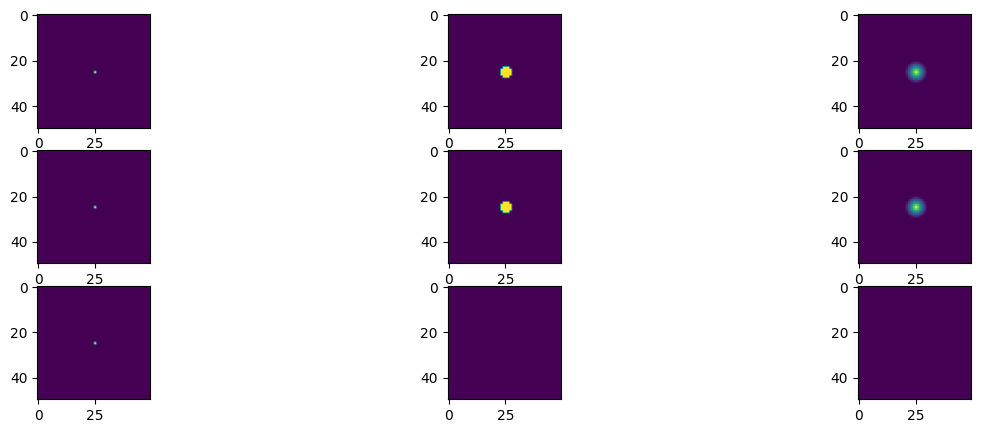

In [92]:
test_conv(arr_void, idx_conv, brush_odd)